<a href="https://colab.research.google.com/github/novoforce/Exploring-Tensorflow/blob/main/Auto_encoder_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Input
from keras.models import Model

print(tf.__version__)

2.6.0


# Vanilla Auto-encoder

In [2]:
# 784-> 32-> 784
encoding_dim= 32  # compress the image to the factor of 784/32 == 24.5
input_img= Input(shape=(784,))
encoded= Dense(encoding_dim,activation="relu")(input_img) #encoded representation
decoded= Dense(784,activation="sigmoid")(encoded) #reconstruction from the encoded form

#The reason behind usage of sigmoid is so as to get the image in the range of 0-1(normalized)
auto_encoder= Model(input_img,decoded)

auto_encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Build encoder model
encoder= Model(input_img,encoded)
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Build decoder
encoded_input= Input(shape=(encoding_dim,)) # flexibility of giving our own input
decoder_layer= auto_encoder.layers[-1] (encoded_input) #retreiving the last layer of the autoencoder(to keep the trained weights)
decoder= Model(encoded_input,decoder_layer)

decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


# Pre-process Mnist data


In [5]:
(x_train,_), (x_test, _) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
import numpy as np

x_train= x_train.astype('float32') / 255
x_test= x_test.astype('float32') / 255

x_train= x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test= x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [8]:
auto_encoder.compile(optimizer='adam',loss='binary_crossentropy')
auto_encoder.fit(x_train,x_train,epochs=25,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/25
235/235 [==============================] - 4s 5ms/step - loss: 0.2738 - val_loss: 0.1892
Epoch 2/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1714 - val_loss: 0.1544
Epoch 3/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1446 - val_loss: 0.1335
Epoch 4/25
235/235 [==============================] - 1s 5ms/step - loss: 0.1286 - val_loss: 0.1214
Epoch 5/25
235/235 [==============================] - 1s 5ms/step - loss: 0.1186 - val_loss: 0.1132
Epoch 6/25
235/235 [==============================] - 1s 5ms/step - loss: 0.1117 - val_loss: 0.1076
Epoch 7/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1069 - val_loss: 0.1035
Epoch 8/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1032 - val_loss: 0.1002
Epoch 9/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1002 - val_loss: 0.0976
Epoch 10/25
235/235 [==============================] - 1s 5ms/step - loss: 0.0980 - val_loss: 0.0959

In [9]:
encoded_img= encoder.predict(x_test)
decoded_img= decoder.predict(encoded_img)

# X_test 

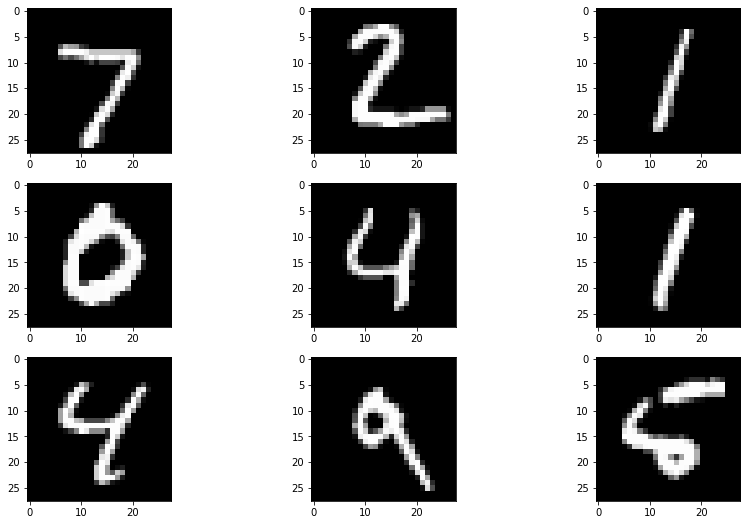

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for i in range(0,9):
    plt.subplot(5, 3, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray") #'image_list' is the list of images
    # plt.xlabel(CLASSES[labels[i]]) # 'labels' is the list of labels
plt.tight_layout()
plt.show()

# Decoded output

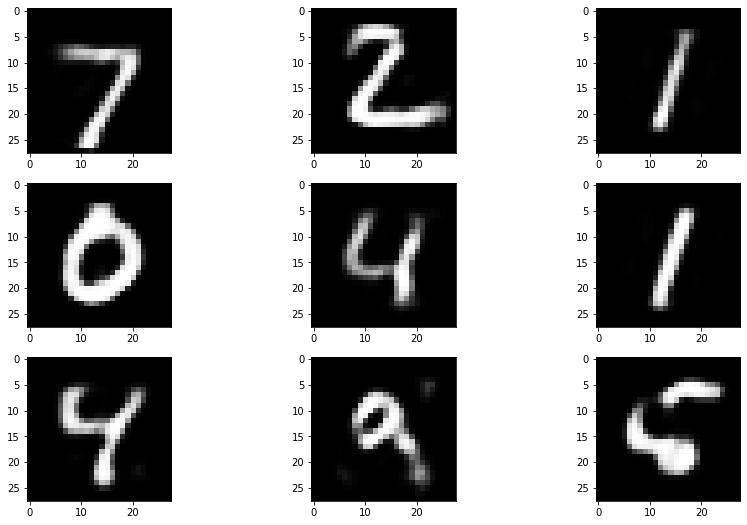

In [14]:

plt.figure(figsize=(12, 12))
for i in range(0,9):
    plt.subplot(5, 3, i+1)
    plt.imshow(decoded_img[i].reshape(28,28), cmap="gray") #'image_list' is the list of images
    # plt.xlabel(CLASSES[labels[i]]) # 'labels' is the list of labels
plt.tight_layout()
plt.show()

# Save the models

In [16]:
encoder.save("/content")
decoder.save("/content")

INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
